<font size=4>**Create Plots**</font>

**Plot with Symbolic Plotting Functions**

MATLAB® provides many techniques for plotting numerical data. Graphical capabilities of MATLAB include plotting tools, standard plotting functions, graphic manipulation and data exploration tools, and tools for printing and exporting graphics to standard formats. Symbolic Math Toolbox™ expands these graphical capabilities and lets you plot symbolic functions using:

- <font color=blue>fplot</font> to create 2-D plots of symbolic expressions, equations, or functions in Cartesian coordinates.
- <font color=blue>fplot3</font> to create 3-D parametric plots.
- <font color=blue>ezpolar</font> to create plots in polar coordinates.
- <font color=blue>fsurf</font> to create surface plots.
- <font color=blue>fcontour</font> to create contour plots.
- <font color=blue>fmesh</font> to create mesh plots.

Plot the symbolic expression $sin(6x)$ by using **fplot**. By default, **fplot** uses the range $−5<x<5$.

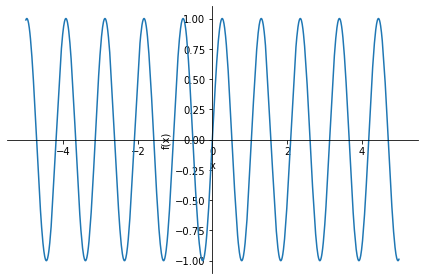

In [4]:
from sympy import *
x = symbols('x')
plot(sin(6*x),(x,-5,5))

Plot a symbolic expression or function in polar coordinates $r$ (radius) and $\theta$ (polar angle) by using **ezpolar**. By default, **ezpolar** plots a symbolic expression or function over the interval $0<\theta<2\pi$.

Plot the symbolic expression $sin(6t)$ in polar coordinates.

Text(0.5, 1.0, '$r=sin(6t)$')

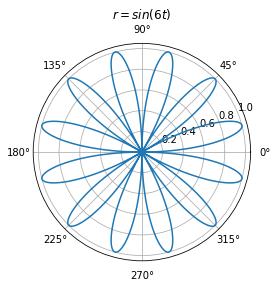

In [32]:
#syms t
#ezpolar(sin(6*t))
import matplotlib.pyplot as plt
import numpy as np

t = symbols('t')
eqf = lambdify(t,sin(6*t))
angle = np.arange(0,2*np.pi,1/100)
plt.polar(angle,np.abs(eqf(angle)))
plt.title('$r=sin(6t)$')

**Plot Functions Numerically**

As an alternative to plotting expressions symbolically, you can substitute symbolic variables with numeric values by using **subs**. Then, you can use these numeric values with plotting functions in MATLAB™.

In the following expressions **u** and **v**, substitute the symbolic variables **x** and **y** with the numeric values defined by **meshgrid**.

In [45]:
x,y = symbols('x y')
u = sin(x**2+y**2)
v = cos(x*y)

Now, you can plot **U** and **V** by using standard MATLAB plotting functions.

Create a plot of the vector field defined by the functions $U(X,Y)$ and $V(X,Y)$ by using the MATLAB **quiver** function.

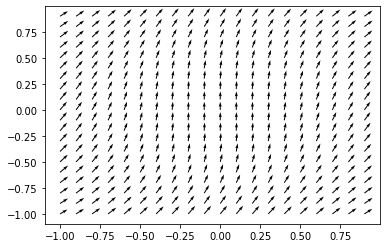

In [46]:
eqfU = lambdify((x,y),u)
eqfV = lambdify((x,y),v)
X,Y = np.meshgrid(np.arange(-1,1,0.1),np.arange(-1,1,0.1))
plt.quiver(X,Y,eqfU(X,Y),eqfV(X,Y))

**Plot Multiple Symbolic Functions in One Graph**

Plot several functions on one graph by adding the functions sequentially. After plotting the first function, add successive functions by using the **hold** on command. The **hold on** command keeps the existing plots. Without the **hold on** command, each new plot replaces any existing plot. After the **hold on** command, each new plot appears on top of existing plots. Switch back to the default behavior of replacing plots by using the **hold off** command.

Plot $f=e^x sin(20x)$ using **fplot**. Show the bounds of **f** by superimposing plots of $e^x$ and $-e^x$ as dashed red lines. Set the title by using the **DisplayName** property of the object returned by **fplot**.

In [49]:
x,y = symbols('x y')
f = exp(x)*sin(20*x)

$f=sin(20x)e^x$

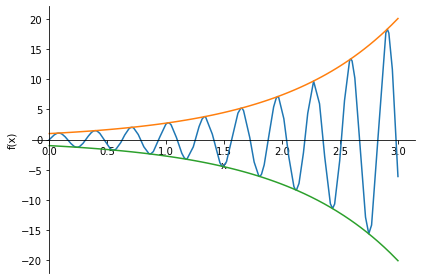

In [64]:
p1 = plot(f,exp(x),-exp(x),(x,0,3))

**Plot Multiple Symbolic Functions in One Figure**

Display several functions side-by-side in one figure by dividing the figure window into several subplots using **subplot**. The command **subplot(m,n,p)** divides the figure into a **m** by **n** matrix of subplots and selects the subplot **p**. Display multiple plots in separate subplots by selecting the subplot and using plotting commands. Plotting into multiple subplots is useful for side-by-side comparisons of plots.

Compare plots of $sin\left(\left(x^2+y^2\right)/a\right)$ for $a=10,20,50,100$ by using subplot to create side-by-side subplots.

Text(0.0, 1.0, '$a=100$')

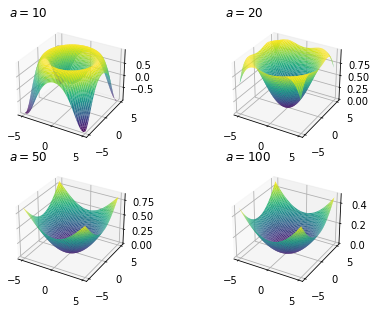

In [128]:
import mpl_toolkits.mplot3d

x,y,a = symbols('x y a')
eqf3 = lambdify((x,y,a),sin((x**2+y**2)/a))
X,Y = np.meshgrid(np.arange(-5,5,0.1),np.arange(-5,5,0.1))

fig = plt.figure(constrained_layout=True)
ax0 = fig.add_subplot(2,2,1,projection='3d')
ax0.plot_surface(X,Y,eqf3(X,Y,10),cmap=plt.cm.viridis) #使用viridis色谱
ax0.set_title('$a=10$',loc='left')
ax1 = fig.add_subplot(2,2,2,projection='3d')
ax1.plot_surface(X,Y,eqf3(X,Y,20),cmap=plt.cm.viridis) #使用viridis色谱
ax1.set_title('$a=20$',loc='left')
ax2 = fig.add_subplot(2,2,3,projection='3d')
ax2.plot_surface(X,Y,eqf3(X,Y,50),cmap=plt.cm.viridis) #使用viridis色谱
ax2.set_title('$a=50$',loc='left')
ax3 = fig.add_subplot(2,2,4,projection='3d')
ax3.plot_surface(X,Y,eqf3(X,Y,100),cmap=plt.cm.viridis) #使用viridis色谱
ax3.set_title('$a=100$',loc='left')

**Combine Symbolic Function Plots and Numeric Data Plots**

Plot numeric and symbolic data on the same graph by using MATLAB and Symbolic Math Toolbox functions together.

For numeric values of **x** between $[−5,5]$, return a noisy sine curve by finding $y=sin(x)$ and adding random values to **y**. View the noisy sine curve by using **scatter** to plot the points $(x1,y1),(x2,y2),⋯$.

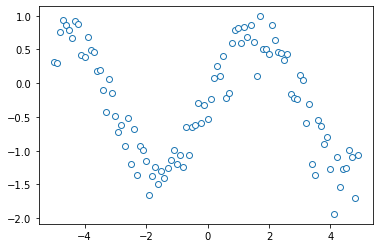

In [171]:
x = np.arange(-5,5,1/10)
y = np.sin(x)+((-1)*np.random.randint(10,size=100)*np.random.rand(100))/8
fig,ax = plt.subplots()
ax.scatter(x,y,c='w',edgecolors='#1f77b4')

Show the underlying structure in the points by superimposing a plot of the sine function. First, use **hold on** to retain the **scatter** plot. Then, use **fplot** to plot the sine function.

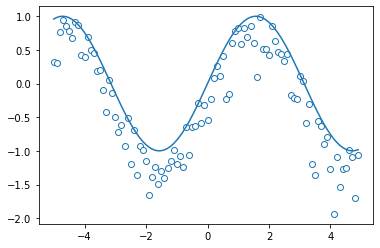

In [173]:
#hold on
#syms t
#fplot(sin(t))
#hold off
t = symbols('t')
eqft = lambdify(t,sin(t))
fig,ax = plt.subplots()
ax.scatter(x,y,c='w',edgecolors='#1f77b4')
ax.plot(x,eqft(x))

**Combine Numeric and Symbolic Plots in 3-D**

Combine symbolic and numeric plots in 3-D by using MATLAB and Symbolic Math Toolbox plotting functions. Symbolic Math Toolbox provides these 3-D plotting functions:

- <font color=blue>fplot3</font> creates 3-D parameterized line plots.
- <font color=blue>fsurf</font> creates 3-D surface plots.
- <font color=blue>fmesh</font> creates 3-D mesh plots.

Create a spiral plot by using **fplot3** to plot the parametric line
$$ x=(1-t)sin(100t)$$
$$ y=(1-t)cos(100t)$$
$$ z=\sqrt{1-x^2-y^2}$$

Text(0.5, 0.92, 'Symbolic 3-D Parametric Line')

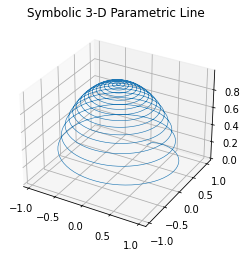

In [207]:
t = symbols('t')
x = (1-t)*sin(100*t)
y = (1-t)*cos(100*t)
z = sqrt(1-x**2-y**2)
eqfx = lambdify(t,x)
eqfy = lambdify(t,y)
eqfz = lambdify(t,z)
X = eqfx(np.arange(0,1,1/1000))
Y = eqfy(np.arange(0,1,1/1000))
Z = eqfz(np.arange(0,1,1/1000))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(X,Y,Z,linewidth=0.6)
ax.set_title('Symbolic 3-D Parametric Line')

Superimpose a plot of a sphere with radius 1 and center at $(0, 0, 0)$. Find points on the sphere numerically by using **sphere**. Plot the sphere by using **mesh**. The resulting plot shows the symbolic parametric line wrapped around the top hemisphere.

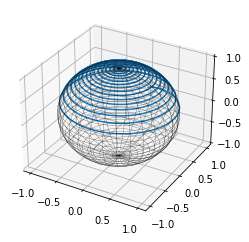

In [223]:
#hold on
#[X,Y,Z] = sphere;
#mesh(X, Y, Z)
#colormap(gray)
#title('Symbolic Parametric Plot and a Sphere')
#hold off
theta,phi = np.meshgrid(np.linspace(0,2*np.pi,30),np.linspace(0,np.pi,30))
X_sphere = np.sin(phi)*np.cos(theta)
Y_sphere = np.sin(phi)*np.sin(theta)
Z_sphere = np.cos(phi)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X_sphere,Y_sphere,Z_sphere,linewidth=0.2,color='black')
ax.plot(X,Y,Z)